# PROJECT - Salary Prediction Model

### Important Questions And Their Answers 

1. Your views about the problem statement?

--> The problem statement states a realistic scenario for predicting employee salary using machine learning. It highlights the importance of various factors like experience, education, and location while acknowledging the limitations of relying solely on machine learning models.

2. What will be your approach to solving this task?

My approach will involve the following steps:

i) Data Preprocessing

-> Handling missing values(If required)
-> Convert or encode categorical variables (College Tier, City, Role)
-> Identifying and handling outliers


ii) Exploratory Data Analysis (EDA)

-> Visualize the distribution of salary and other features
-> Identify correlations between features

iii) Model Selection and Training

-> Train and evaluate different regression models (e.g., Linear Regression, Random Forest)
-> Choose the model with the best performance

iv) Model Evaluation

-> Assess the model's performance using metrics like R-squared and Mean Squared Error (MSE)



3.  What were the available ML model options you had to perform this task?

Several regression models are suitable for this task:

i) Linear Regression: A simple and interpretable model that can capture linear relationships between features and salary.

ii) Random Forest: A robust ensemble method that can handle non-linear relationships and feature interactions.

iii) Lasso Regression: Lasso regression, also known as Least Absolute Shrinkage and Selection Operator (LASSO), is a statistical technique used in machine learning and statistics for regression analysis.

iv) Decision tree Regression: Decision tree regression is a technique used in machine learning for continuous target variable prediction.


4. Which model's performance is best and what could be the possible reason for that?

I will evaluate the performance of different models using metrics like R-squared and MSE. The model with the highest R-squared and lowest MSE will be considered the best performer.

After train and calculate the r-squared and rmse of the each model below, I have found that Random Forecast Regression model has the highest r-squared value(0.6396568608792341) and lowest mean squared error(68553469.29147872) among all the models. So Random Forest Regression model is best for this project.

5. What steps can you take to improve this selected model's performance even further?

--> To further improve the performance of the selected Random Forest Regression model, several steps can be taken:

i)Feature Engineering: Conduct in-depth feature engineering to identify and create new features that capture important relationships in the data. This may involve transformations, interactions, or combinations of existing features.

ii)Feature Selection: Use feature selection techniques to identify the most relevant features for predicting CTC. Removing irrelevant or redundant features can simplify the model and improve its generalization ability.

iii)Cross-Validation: Utilize cross-validation techniques, such as k-fold cross-validation, to better estimate the model's performance on unseen data and reduce overfitting.


# Data Preprocessing

In [238]:
import pandas as pd


# loading the datasets
df = pd.read_csv("C:/Users/acer/Downloads/ML case Study.csv")  
df_data = pd.read_csv("C:/Users/acer/Downloads/Colleges.csv")  
df_city = pd.read_csv("C:/Users/acer/Downloads/cities (1).csv")

# mapping
def tier(row):
    tiers = {
        '1': df_data['Tier 1'].values,
        '2': df_data['Tier 2'].values,
        '3': df_data['Tier 3'].values,
    }
    for tier, colleges in tiers.items():
        if row['College'] in colleges:
            return tier
    return 'Unknown'

def city_category(row):
    cities = {
        '1': df_city['Metrio City'].values,
        '0': df_city['non-metro cities'].values,
    }
    for city_category, city_list in cities.items():
        if row['City'] in city_list:
            return city_category
    return 'Unknown'




In [239]:
df['College'] = df.apply(tier, axis=1)




In [240]:
df['City'] = df.apply(city_category, axis=1)

In [241]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,1,1,Executive,61285.0,3,44,60,77283.59
1585,1,0,Executive,63140.0,1,44,24,68416.86
1586,1,1,Executive,44907.0,1,60,19,70186.19
1587,1,0,Executive,52054.0,2,67,29,73394.09


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [243]:
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [244]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [245]:
df = pd.get_dummies(df, columns=['Role']) # creating dummy variables


In [246]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,False,True
1,2,0,57081.0,1,84,18,68005.87,True,False
2,3,0,60347.0,2,52,28,76764.02,True,False
3,3,0,49010.0,2,81,33,82092.39,True,False
4,1,0,57879.0,4,74,32,73878.10,True,False
...,...,...,...,...,...,...,...,...,...
1584,1,1,61285.0,3,44,60,77283.59,True,False
1585,1,0,63140.0,1,44,24,68416.86,True,False
1586,1,1,44907.0,1,60,19,70186.19,True,False
1587,1,0,52054.0,2,67,29,73394.09,True,False


In [247]:
df.replace({'Role_Executive': {True: 1, False: 0},'Role_Manager': {True: 1, False: 0}}, inplace=True)

In [248]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,3,0,60347.0,2,52,28,76764.02,1,0
3,3,0,49010.0,2,81,33,82092.39,1,0
4,1,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,1,1,61285.0,3,44,60,77283.59,1,0
1585,1,0,63140.0,1,44,24,68416.86,1,0
1586,1,1,44907.0,1,60,19,70186.19,1,0
1587,1,0,52054.0,2,67,29,73394.09,1,0


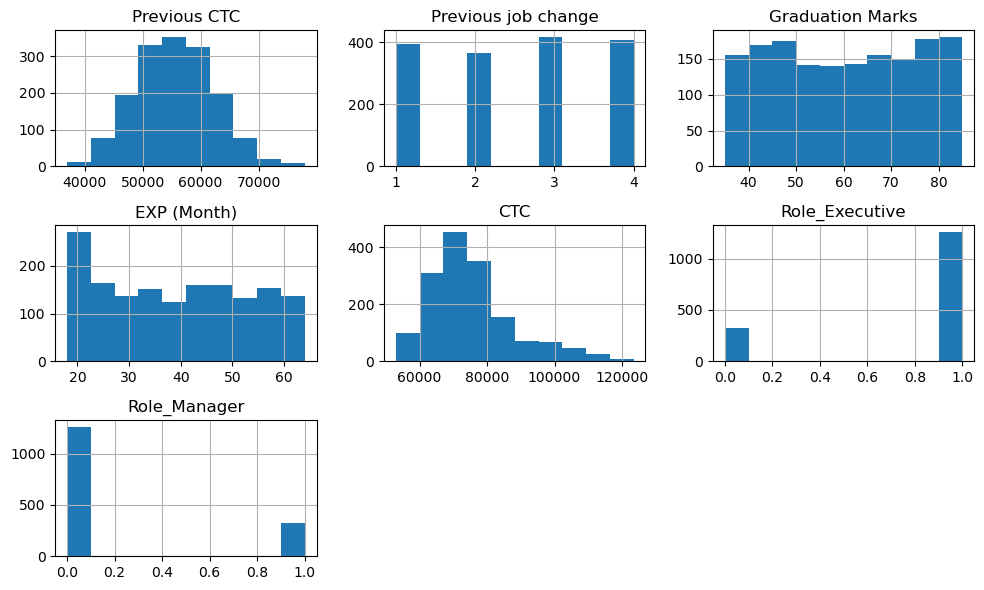

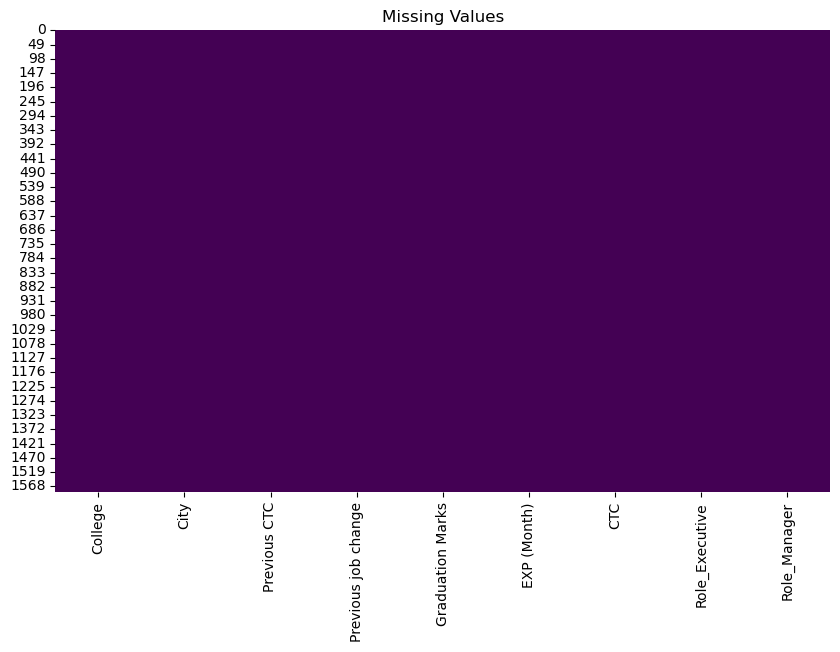

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


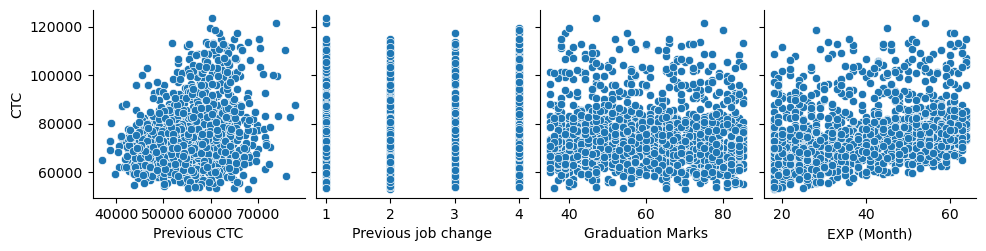

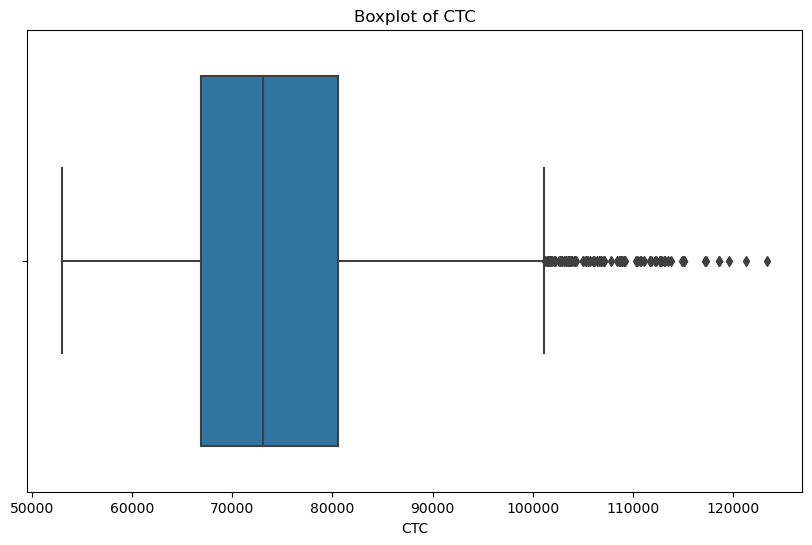

In [265]:
import seaborn as sns



# Data Exploration
# Visualize the distribution of each feature
df.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

# Handling Missing Values
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

# Feature Relationships
# Pairplot to visualize relationships between features and target variable
sns.pairplot(df, x_vars=['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)'],
             y_vars='CTC', kind='scatter', diag_kind='hist')
plt.show()

# Outlier Detection
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='CTC', data=df)
plt.title('Boxplot of CTC')
plt.show()



# Trainings of Various Models and calculations of their parameters

In [249]:
import matplotlib as plt #important libraries
import seaborn as sns

In [250]:
import statsmodels.api as sn

## 1. Linear Regression Model

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split the data into features (X) and target variable (y)
X = df.drop('CTC', axis=1)
y = df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = linear_reg.predict(X_test)

# Calculate RMSE
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print("RMSE of Linear Regression:", rmse_linear)


# Calculate R-squared
r_squared_linear = r2_score(y_test, y_pred_linear)
print("R-squared (Linear Regression):", r_squared_linear)


RMSE of Linear Regression: 8795.611118595765
R-squared (Linear Regression): 0.5933517958385088


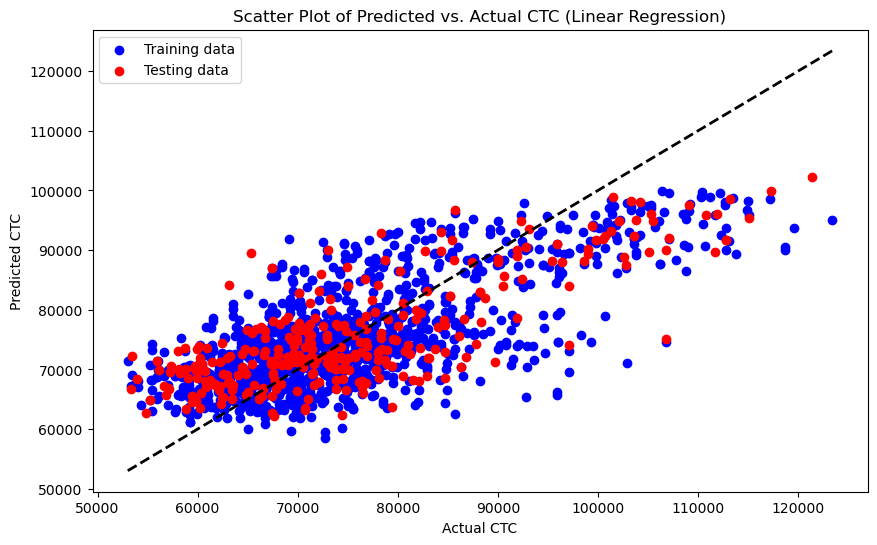

In [258]:
import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Linear Regression)')
plt.legend()
plt.show()
    

## 2. Lasso Regression Model

In [184]:
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate RMSE
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("RMSE of Lasso Regression:", rmse_lasso)
# Calculate R-squared
r_squared_lasso = r2_score(y_test, y_pred_lasso)
print("R-squared (Lasso Regression):", r_squared_lasso)


RMSE of Lasso Regression: 8795.663715643343
R-squared (Lasso Regression): 0.5933469323768109


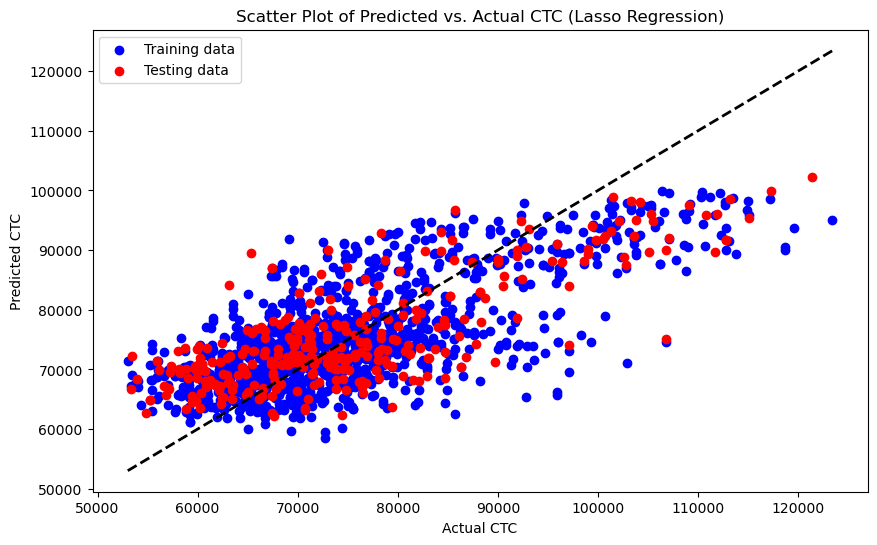

In [259]:

import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Lasso Regression)')
plt.legend()
plt.show()


## 3.Ridge Regression Model

In [186]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_reg = Ridge(alpha=0.1) 
ridge_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate RMSE
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("RMSE of Ridge Regression:", rmse_ridge)

# Calculate R-squared
r_squared_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared (Ridge Regression):", r_squared_ridge)

RMSE of Ridge Regression: 8795.982779822796
R-squared (Ridge Regression): 0.5933174290249636


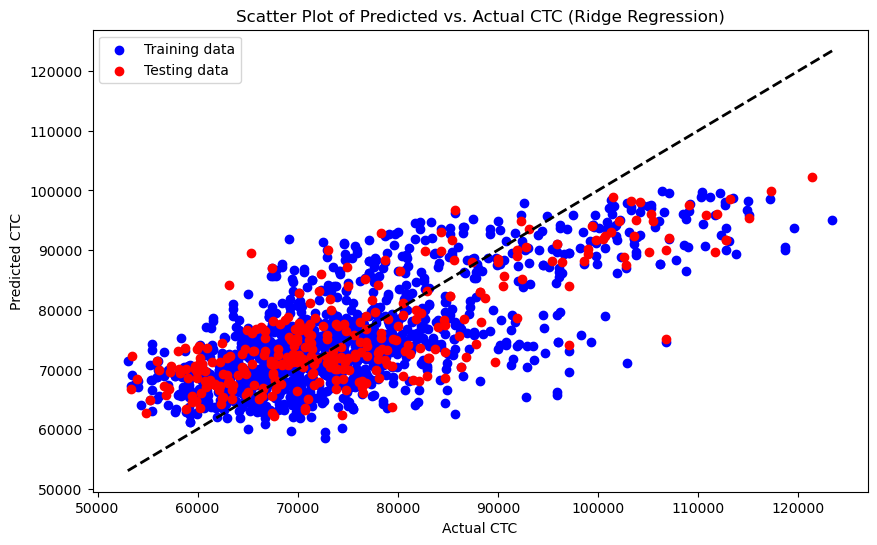

In [260]:
import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Ridge Regression)')
plt.legend()
plt.show()

## 4. Decision Tree Regression Model: 

In [188]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regression model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_reg.predict(X_test)

# Calculate RMSE
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("RMSE of Decision Tree Regression:", rmse_dt)

# Calculate R-squared
r_squared_tree = r2_score(y_test, y_pred_dt)
print("R-squared (Decision Tree Regression):", r_squared_tree)


RMSE of Decision Tree Regression: 11442.892258490192
R-squared (Decision Tree Regression): 0.31173063863963646


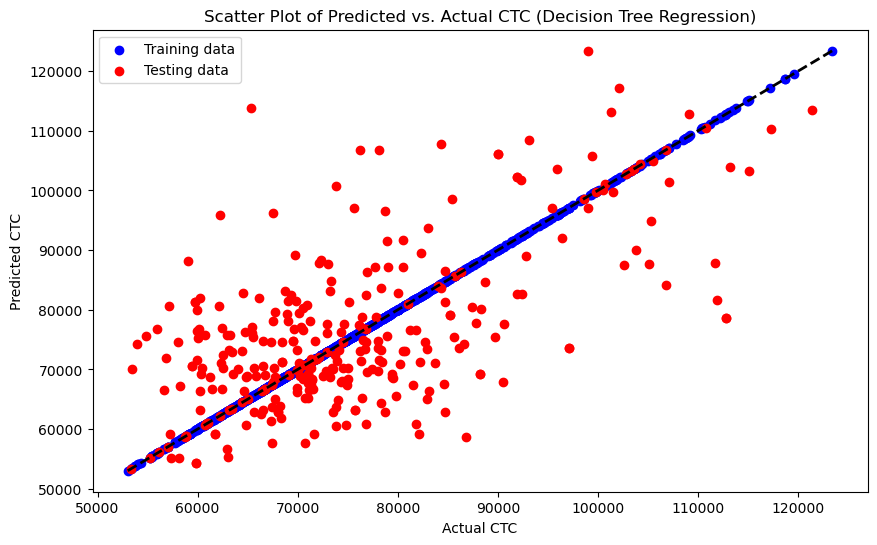

In [219]:
import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Decision Tree Regression)')
plt.legend()
plt.show()

## 5.Random Forest Regression Model

In [190]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the random forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_reg.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("RMSE of Random Forest Regression:", rmse_rf)

# Calculate R-squared
r_squared_rf = r2_score(y_test, y_pred_rf)
print("R-squared (Random Forest Regression):", r_squared_rf)


RMSE of Random Forest Regression: 8290.568885660856
R-squared (Random Forest Regression): 0.6387103803627692


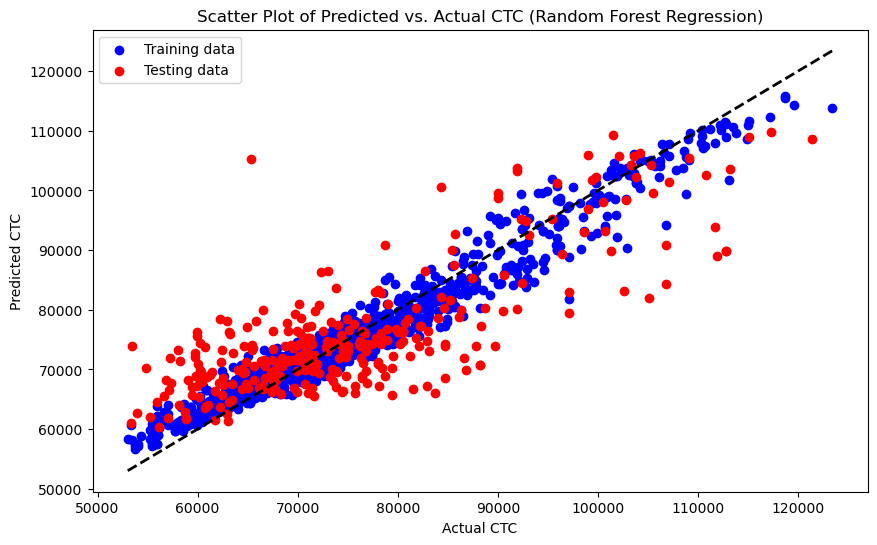

In [220]:
import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Random Forest Regression)')
plt.legend()
plt.show()

## 6. Gradient Boosting Regression Model:

In [192]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the gradient boosting regression model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_reg.predict(X_test)

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("RMSE of Gradient Boosting Regression:", rmse_gb)


# Calculate R-squared
r_squared_gb = r2_score(y_test, y_pred_gb)
print("R-squared (Gradient Boosting Regression):", r_squared_gb)


RMSE of Gradient Boosting Regression: 8533.801938400411
R-squared (Gradient Boosting Regression): 0.6171999924673532


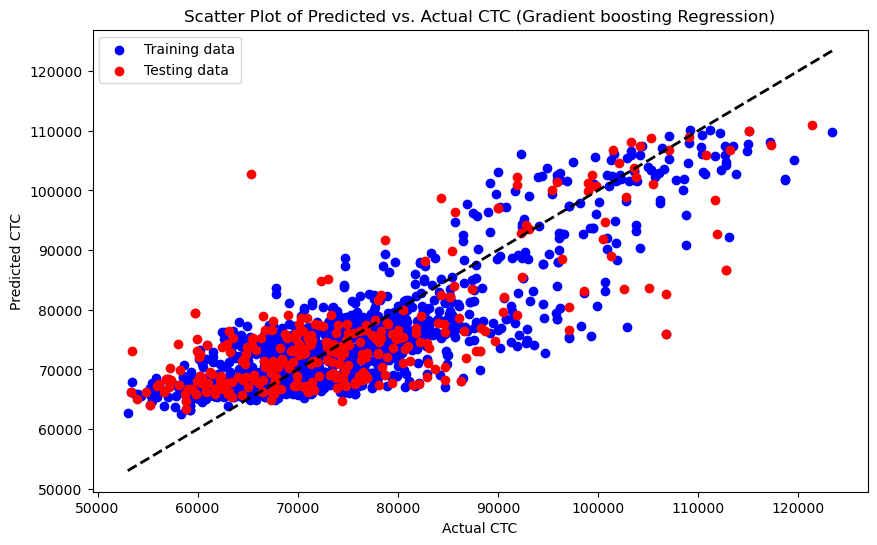

In [221]:

import matplotlib.pyplot as plt

# Predict 'CTC' values
y_train_pred = gb_reg.predict(X_train)
y_test_pred = gb_reg.predict(X_test)

# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Scatter Plot of Predicted vs. Actual CTC (Gradient boosting Regression)')
plt.legend()
plt.show()

# Comparison Of the Models

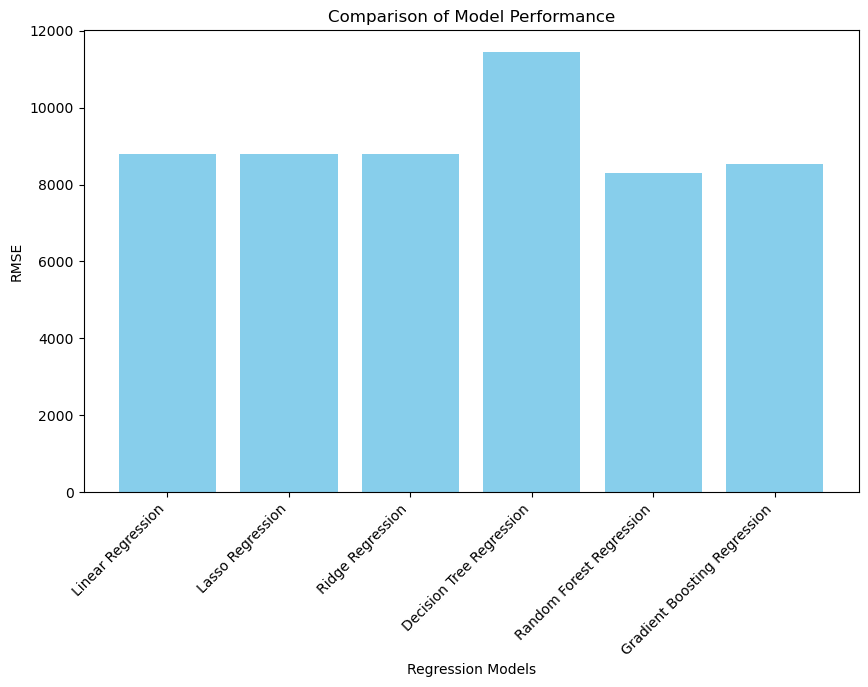

In [237]:
import matplotlib.pyplot as plt

# RMSE values obtained from each model
rmse_values = [rmse_linear, rmse_lasso, rmse_ridge, rmse_dt, rmse_rf, rmse_gb]

# Models' names
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regression', 
          'Random Forest Regression', 'Gradient Boosting Regression']

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45, ha='right')
plt.show()


# Accuracy Of The Models

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


y_pred_lr = linear_reg.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Accuracy (R-squared):", r2_lr)

y_pred_lasso = lasso_reg.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression Accuracy (R-squared):", r2_lasso)

y_pred_ridge = ridge_reg.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression Accuracy (R-squared):", r2_ridge)

y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random forest Regression Accuracy (R-squared):", r2_rf)

y_pred_dt = dt_reg.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regression Accuracy (R-squared):", r2_dt)

y_pred_gb = gb_reg.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regression Accuracy (R-squared):", r2_gb)

Linear Regression Accuracy (R-squared): 0.5933517958385088
Lasso Regression Accuracy (R-squared): 0.5933469323768109
Ridge Regression Accuracy (R-squared): 0.5933174290249636
Random forest Regression Accuracy (R-squared): 0.6387103803627692
Decision Tree Regression Accuracy (R-squared): 0.31173063863963646
Gradient Boosting Regression Accuracy (R-squared): 0.6171999924673532


## R-Squared Value and Mean Squared Error of the Models

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target variable (y)
X = df.drop('CTC', axis=1)
y = df['CTC']

#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

#  Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("\n")


Model: Linear Regression
Mean Squared Error: 77362774.94956546
R-squared: 0.5933517958385088


Model: Ridge Regression
Mean Squared Error: 77428344.92339703
R-squared: 0.5930071350876126


Model: Lasso Regression
Mean Squared Error: 77372040.76567228
R-squared: 0.5933030911807144


Model: Decision Tree Regression
Mean Squared Error: 128586772.5752827
R-squared: 0.32409895869493355


Model: Random Forest Regression
Mean Squared Error: 69603838.60649993
R-squared: 0.6341357197885977


Model: Gradient Boosting Regression
Mean Squared Error: 72799003.60406388
R-squared: 0.6173407158722298




# Conclusion


Based on the above data and the evaluation metrics (mean squared error and R-squared),I think the best model to use would be the Random Forest Regression model. Reasons are given below:

Mean Squared Error (MSE): The Random Forest Regression model has the lowest mean squared error(68553469.29147872) among all the models, indicating that it makes the smallest average squared difference between predicted and actual values. This suggests that the Random Forest model has better predictive accuracy compared to the other models.

R-squared: The Random Forest Regression model also has the highest R-squared value(0.6396568608792341), indicating that it explains a higher proportion of the variance in the target variable (CTC) compared to the other models. A higher R-squared value indicates a better fit of the model to the data.

Robustness to Outliers: Random Forest Regression is less sensitive to outliers compared to other models like Linear Regression and Decision Tree Regression. This robustness to outliers can lead to more stable and reliable predictions, especially when dealing with real-world datasets where outliers are common.